## Import packages

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10,5

## Read the data

In [2]:
#import the data
netflix = pd.read_csv('C:\\Users\\Admin\\Desktop\\Python Training\\dataset\\Netflix-Shows.csv', encoding='latin1')

In [3]:
# let see whatchu got there
netflix.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


## Data Cleaning and others

In [4]:
#lets make the attributes name more friendly
netflix.columns = ['Title', 'Rating', 'RatingDescription', 'RatingLevel', 'ReleaseYear', \
                   'UserRating', 'UserRatingSize']

In [5]:
# Adjusted header 
netflix.head()

,Title,Rating,RatingDescription,RatingLevel,ReleaseYear,UserRating,UserRatingSize
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [6]:
# convert title,rating, rating level and year into category
netflix.Title = netflix.Title.astype('category')
netflix.Rating = netflix.Rating.astype('category')
#netflix.RatingDescription = netflix.RatingDescription.astype('category')
#netflix.ReleaseYear = netflix.ReleaseYear.astype('category')

In [7]:
# remove duplicates
netflix = netflix.drop_duplicates()

In [8]:
# maybe some more info?
netflix.info()
# heck we got some nullies on ratinglevel and user rating score

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              500 non-null    category
 1   Rating             500 non-null    category
 2   RatingDescription  467 non-null    object  
 3   RatingLevel        500 non-null    int64   
 4   ReleaseYear        500 non-null    int64   
 5   UserRating         256 non-null    float64 
 6   UserRatingSize     500 non-null    int64   
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 49.5+ KB


In [9]:
# Since rating level with null is not usefull lets drop it
netflix.RatingDescription.fillna("Not_rated", inplace=True)

In [10]:
# how many nulls in User Rating?
netflix.UserRating.isnull().value_counts()
# 224 nulls 

False    256
True     244
Name: UserRating, dtype: int64

In [11]:
# let see the list of ratings
rlist = netflix.Rating.cat.categories.tolist()
rlist

['G',
 'NR',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'TV-Y7-FV',
 'UR']

In [12]:
# Filling missing null values
# This method will fill null values depend of each Rating of User Rating mean average
for i in list(rlist):
    netflix[netflix['Rating'] == i] = netflix[netflix['Rating'] == i].replace(np.nan, netflix[netflix['Rating'] == i].UserRating.mean())
    

In [13]:
# lets do some quick check
netflix.info()
# well i do see something strange on User rating

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              500 non-null    category
 1   Rating             500 non-null    category
 2   RatingDescription  500 non-null    object  
 3   RatingLevel        500 non-null    int64   
 4   ReleaseYear        500 non-null    int64   
 5   UserRating         499 non-null    float64 
 6   UserRatingSize     500 non-null    int64   
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 49.5+ KB


In [14]:
# Yup only'UR' rating have null value since it only have 1 value
netflix['Rating'].value_counts() 

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: Rating, dtype: int64

In [15]:
# Filling using foward fill method
netflix['UserRating'].fillna(method='ffill', inplace=True)

In [16]:
# Some quick check
netflix[netflix['Rating'] == 'UR']

,Title,Rating,RatingDescription,RatingLevel,ReleaseYear,UserRating,UserRatingSize
38,White Girl,UR,This movie has not been rated. Intended for ad...,124,2016,77.0,82


In [17]:
#removing outlier
netflix.drop(netflix.index[netflix['ReleaseYear'] == 1940], inplace = True)

## Exploratory Data Analysis (EDA)

In [18]:
# Lets see what do we have
netflix.head(10)

,Title,Rating,RatingDescription,RatingLevel,ReleaseYear,UserRating,UserRatingSize
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.000000,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,85.285714,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.000000,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.000000,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.000000,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.000000,80
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.000000,80
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.000000,80
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.000000,80
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.000000,80


In [18]:
# Some basic statistic
netflix.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RatingLevel,499.0,68.821643,31.500339,10.0,41.000000,70.00000,90.0,124.0
ReleaseYear,499.0,2011.118236,7.161368,1976.0,2009.000000,2014.00000,2016.0,2017.0
UserRating,499.0,80.388696,9.733819,55.0,74.421053,82.87013,85.0,99.0
UserRatingSize,499.0,80.973948,0.998655,80.0,80.000000,80.00000,82.0,82.0


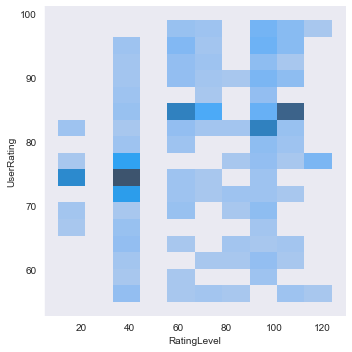

In [127]:
# This shows the capacity of the user rating and the range of rating of the viewer.
viz = sns.displot(data=netflix, x='RatingLevel', y='UserRating')

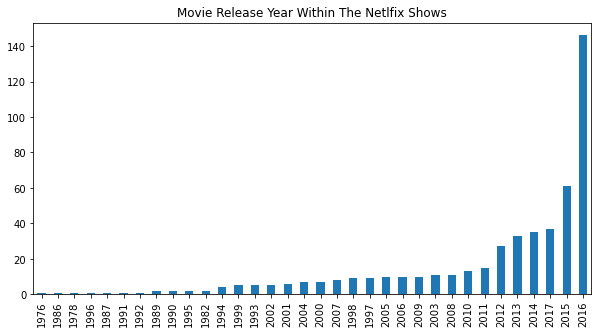

In [128]:
# Which years had the most shows?
# According the the histogram, This illustrated number of movies started to growth every years in the netflix.
ReleaseSum = netflix['ReleaseYear'].value_counts().sort_values()
plt.figure(figsize=(10,5))
ReleaseSum.plot(title='Movie Release Year Within The Netlfix Shows',kind="bar")
plt.show()

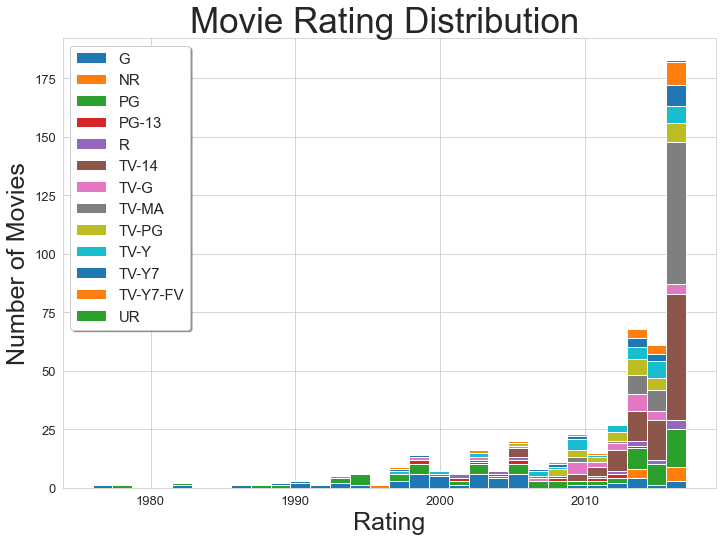

In [47]:

lis = []
leg = []
for gen in netflix.Rating.cat.categories:
    lis.append(netflix[netflix.Rating == gen].ReleaseYear)
    leg.append(gen)
    
sns.set_style('whitegrid')   
fig, ax = plt.subplots()   
fig.set_size_inches(11.7,8.27)
h = plt.hist(lis, bins=30,stacked=True, rwidth=1, label=leg)
plt.title("Movie Rating Distribution ", fontsize=35)
plt.ylabel("Number of Movies", fontsize=25)
plt.xlabel("Rating", fontsize=25)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(frameon=True, fancybox=True, shadow=True, prop={'size':15})
plt.show()

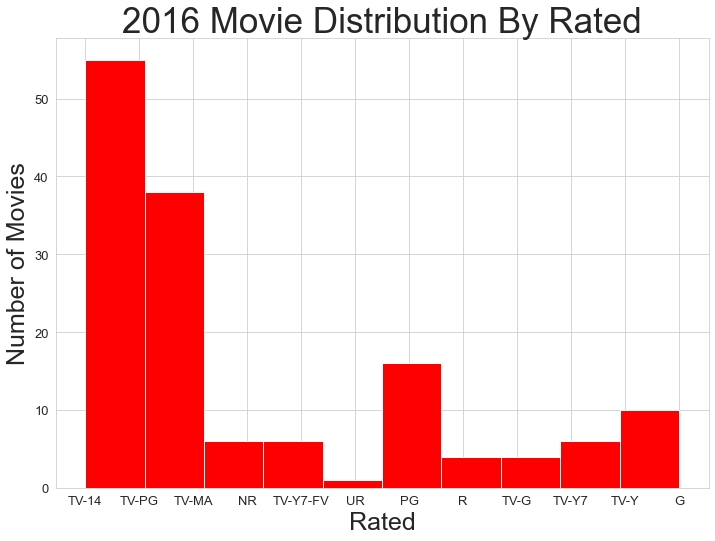

In [67]:
# Multi Stacked Histogram
sns.set_style('whitegrid')   
fig, ax = plt.subplots()   
fig.set_size_inches(11.7,8.27) # Size of A4 paper
h = plt.hist(netflix[netflix.ReleaseYear == 2016].Rating, color='Red')
plt.title("2016 Movie Distribution By Rated", fontsize=35)
plt.ylabel("Number of Movies", fontsize=25,)
plt.xlabel("Rated", fontsize=25)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()

In [ ]:
# Start with one review:
#text = df.description[0]

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [97]:
netflix.RatingDescription

0      crude and sexual humor, language and some drug...
1      strong violence, sexual content and adult lang...
2      Parents strongly cautioned. May be unsuitable ...
3      Parents strongly cautioned. May be unsuitable ...
4      Parental guidance suggested. May not be suitab...
                             ...                        
989                    some rude humor and sports action
993            General Audiences. Suitable for all ages.
994            General Audiences. Suitable for all ages.
997                               Suitable for all ages.
998                               Suitable for all ages.
Name: RatingDescription, Length: 499, dtype: object

In [77]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [93]:
text = " ".join(review for review in netflix.RatingDescription)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 25754 words in the combination of all review.


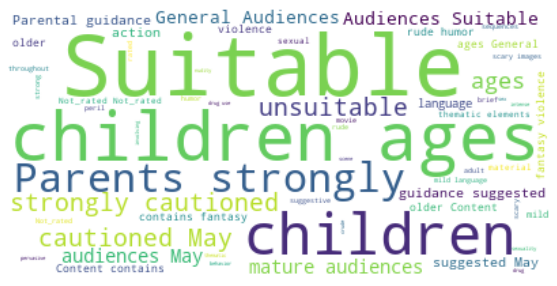

In [108]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["audiences may", "audiences May","suggested", "For", "some", "and","May be","Audiences suitable",\
                  "cautioned may", "cautioned May","Audiences Suitable","strongly", "Suitable"])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Dashboard

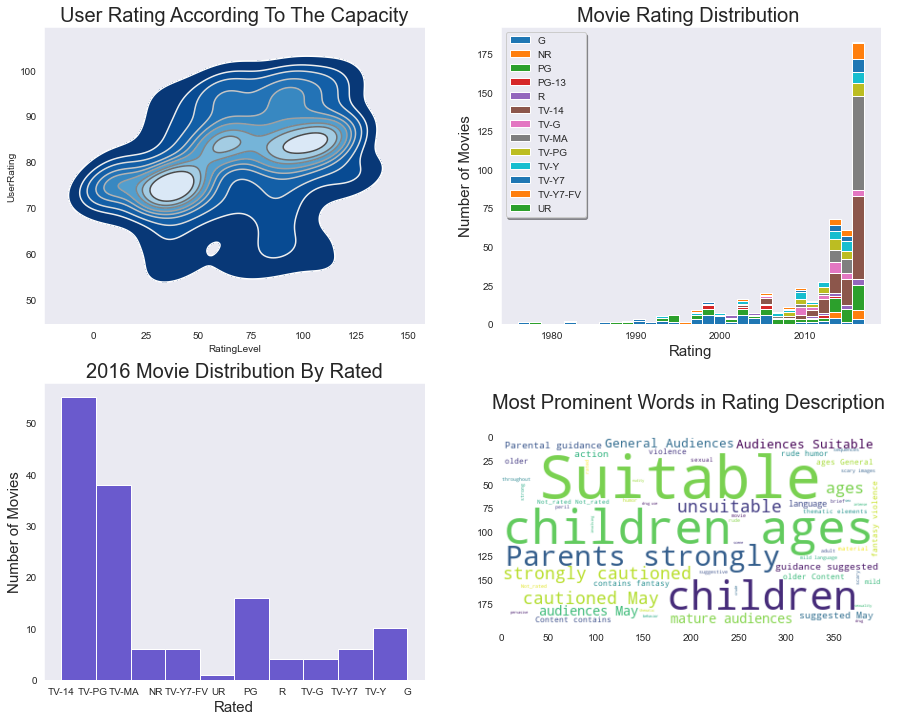

In [180]:
sns.set_style('dark')
f, axes=plt.subplots(2,2, figsize=(15,12))

# Kdeplot
axes[0,0].set_title("User Rating According To The Capacity", fontsize=20)
k1 = sns.kdeplot(netflix.RatingLevel, netflix.UserRating, shade=True, cmap='Blues_r',ax=axes[0,0])
k2 = sns.kdeplot(netflix.RatingLevel, netflix.UserRating, cmap='gist_gray_r',ax=axes[0,0])

# Stacked histogram
lis = []
leg = []
for gen in netflix.Rating.cat.categories:
    lis.append(netflix[netflix.Rating == gen].ReleaseYear)
    leg.append(gen)
axes[0,1].hist(lis, bins=30,stacked=True, rwidth=1, label=leg)
axes[0,1].set_title("Movie Rating Distribution ", fontsize=20)
axes[0,1].set_ylabel("Number of Movies", fontsize=15)
axes[0,1].set_xlabel("Rating", fontsize=15)
axes[0,1].legend(frameon=True, fancybox=True, shadow=True, prop={'size':10})

#Stacked histogram
axes[1,0].hist(netflix[netflix.ReleaseYear == 2016].Rating, color='slateblue')
axes[1,0].set_title("2016 Movie Distribution By Rated", fontsize=20)
axes[1,0].set_ylabel("Number of Movies", fontsize=15,)
axes[1,0].set_xlabel("Rated", fontsize=15)

# Word cloud
axes[1,1].set_title("Most Prominent Words in Rating Description \n", fontsize=20)
axes[1,1].imshow(wordcloud, interpolation='bilinear')